# Howework 3: Optimization (Part 1, Optimization via Gradient Descent)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def gradient_descent(f, grad_f, x0, alpha, maxit, tolx, tolf, backtracking=None):
    x_k = x0
    x_old = np.inf
    x_k_history = []
    x_k_history.append(x_k)

    grad_norm_0 = np.linalg.norm(grad_f(x0), 2)
    grad_norm_history = [grad_norm_0]
    grad_norm_k = grad_norm_0

    f_val_k = f(x_k)
    f_val_history = [f_val_k]

    k = 0
    while (k < maxit and
           np.linalg.norm(x_k - x_old, 2) >= tolx and
           grad_norm_k >= tolf*grad_norm_0):

        if backtracking is not None:
            alpha = backtracking(f, grad_f, x_k)

        x_old = x_k
        x_k = x_k - alpha*grad_f(x_k)
        x_k_history.append(x_k)

        grad_norm_k = np.linalg.norm(grad_f(x_k), 2)
        grad_norm_history.append(grad_norm_k)

        f_val_k = f(x_k)
        f_val_history.append(f_val_k)

        k += 1

    return x_k_history, k, f_val_history, grad_norm_history


In [155]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

In [ ]:
def fn1(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_fn1(x):
    x1, x2 = x
    dx1 = 2*(x1 - 3)
    dx2 = 2*(x2 - 1)
    return np.array([dx1, dx2])

def fn2(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_fn2(x):
    x1, x2 = x
    dx1 = 20*(x1 - 1)
    dx2 = 2*(x2 - 2)
    return np.array([dx1, dx2])

def fn3(x):
    # todo: try for different values of n
    n = x.shape[0]
    v = np.linspace(0, 1, num=n, endpoint=True, axis=0)
    A = np.vander(v)

    x_true = np.ones(n)
    b = A @ x_true
    print(b.shape)
    return (1/2) * np.linalg.norm(A@x - b, 2)**2

def grad_fn3(x):
    n = x.shape[0]
    v = np.linspace(0, 1, num=n, endpoint=True, axis=0)
    A = np.vander(v)

    x_true = np.ones(n)
    b = A @ x_true
    return (x.T @ A.T @ A - b.T @ A)
    # return A.T @ (A @ x - b)

def fn4(x, lambda_reg):
    # todo: try for different values of lambda
    if (lambda_reg > 1) :
        lambda_reg = 1
    elif (lambda_reg < 0) :
        lambda_reg = 0

    return fn3(x) + (lambda_reg/2) * np.linalg.norm(x, 2)

def grad_fn4(x, lambda_reg):
    return grad_fn3(x) + lambda_reg * x.T

def fn5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_fn5(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

x = np.array([1,1,1,11,1,1])
print(fn3(x))

(6,)
78.32000000000004


In [157]:
x0 = np.zeros(2)
kmax = 100
tolf = tolx = 1e-5
alpha = 0.1
x_k_history, k, f_val_history, grad_norm_history = gradient_descent(fn1, grad_fn1, x0, alpha, kmax, tolx, tolf)

[array([0., 0.]), array([0.6, 0.2]), array([1.08, 0.36]), array([1.464, 0.488]), array([1.7712, 0.5904]), array([2.01696, 0.67232]), array([2.213568, 0.737856]), array([2.3708544, 0.7902848]), array([2.49668352, 0.83222784]), array([2.59734682, 0.86578227]), array([2.67787745, 0.89262582]), array([2.74230196, 0.91410065]), array([2.79384157, 0.93128052]), array([2.83507326, 0.94502442]), array([2.8680586 , 0.95601953]), array([2.89444688, 0.96481563]), array([2.91555751, 0.9718525 ]), array([2.93244601, 0.977482  ]), array([2.9459568, 0.9819856]), array([2.95676544, 0.98558848]), array([2.96541235, 0.98847078]), array([2.97232988, 0.99077663]), array([2.97786391, 0.9926213 ]), array([2.98229113, 0.99409704]), array([2.9858329 , 0.99527763]), array([2.98866632, 0.99622211]), array([2.99093306, 0.99697769]), array([2.99274645, 0.99758215]), array([2.99419716, 0.99806572]), array([2.99535772, 0.99845257]), array([2.99628618, 0.99876206]), array([2.99702894, 0.99900965]), array([2.99762316

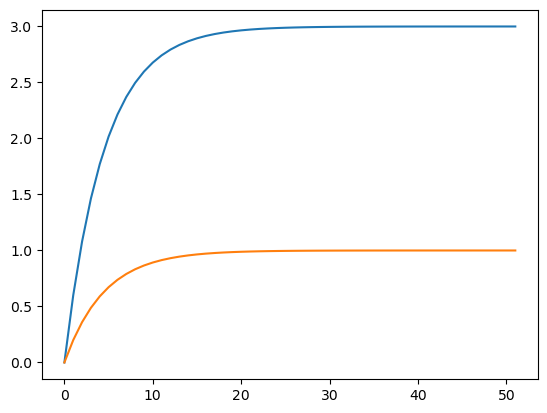

In [158]:
plt.plot(x_k_history)
plt.show

print(x_k_history)

#### Results with fixed $\alpha$

In [159]:
def plot_functions(norms, norms_bt):
    plt.figure(figsize=(10, 6))
    plt.plot(norms, label='With fixed $\alpha$')
    plt.plot(norms_bt, label='With backtracking')
    plt.xlabel('Iteration $k$')
    plt.ylabel('$||\Delta f(x_k)||_2$')
    plt.legend()
    plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1561043/1267346857.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$||\Delta f(x_k)||_2$')


#### Plotting function 5

/tmp/ipykernel_1561043/1342143388.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


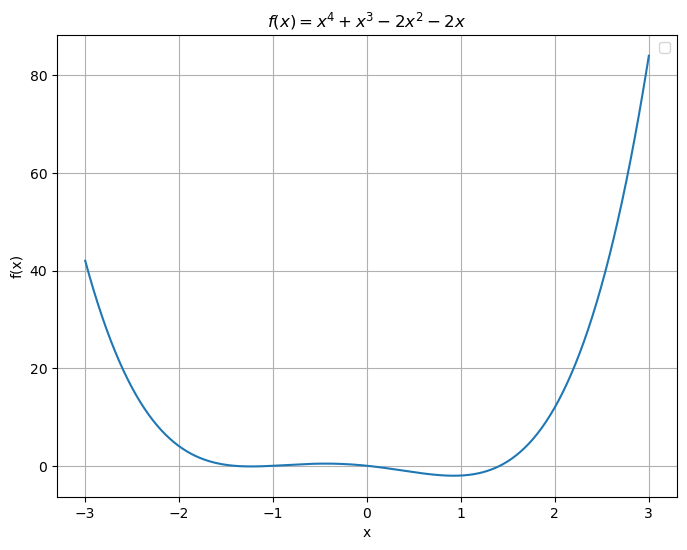

/tmp/ipykernel_1561043/3187911665.py:57: RuntimeWarning: overflow encountered in power
  return 4*x**3 + 3*x**2 - 4*x - 2
/tmp/ipykernel_1561043/3187911665.py:57: RuntimeWarning: overflow encountered in square
  return 4*x**3 + 3*x**2 - 4*x - 2
/tmp/ipykernel_1561043/3187911665.py:57: RuntimeWarning: invalid value encountered in add
  return 4*x**3 + 3*x**2 - 4*x - 2


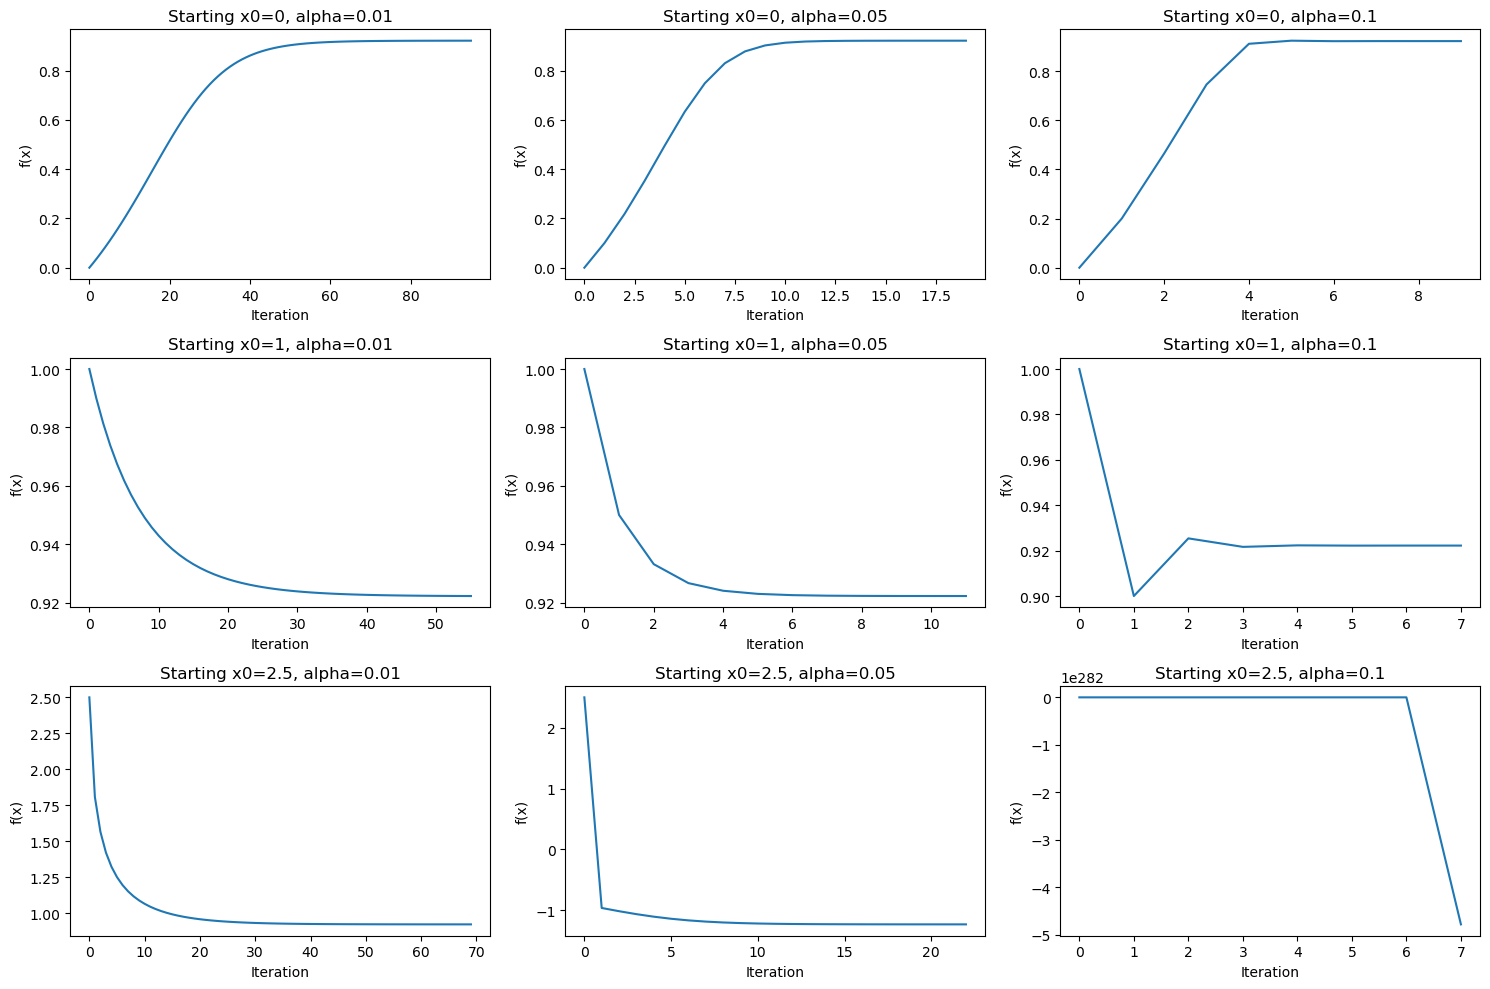

In [160]:
x = np.linspace(-3, 3, 400)
y = fn5(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.grid(True)
plt.legend()
plt.show()

x0s = [0, 1, 2.5]
alphas = [0.01, 0.05, 0.1]

fig, axs = plt.subplots(nrows=(len(x0s)*len(alphas) + 2) // 3, ncols=3, figsize=(15, 10))  # Adjust size as needed
axs = axs.flatten()

plot_index = 0
for x0 in x0s:
    for alpha in alphas:
        x_k_history, _, _, _ = gradient_descent(fn5, grad_fn5, np.array([x0]), alpha, kmax, tolx, tolf)
        axs[plot_index].plot(x_k_history)
        axs[plot_index].set_title(f'Starting x0={x0}, alpha={alpha}')
        axs[plot_index].set_xlabel('Iteration')
        axs[plot_index].set_ylabel('f(x)')
        plot_index += 1

for ax in axs[plot_index:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

#### Contour plots for function 1 and 2

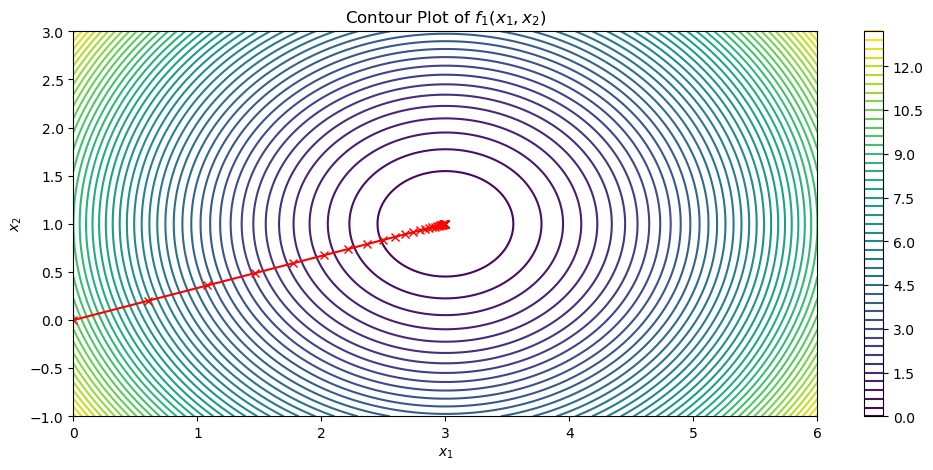

In [173]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 6, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z1 = fn1((X1, X2))

plt.figure(figsize=(12, 5))
plt.contour(X1, X2, Z1, levels=50)
plt.colorbar()
plt.title('Contour Plot of $f_1(x_1, x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Gradient descent path for function 1
x0 = np.zeros(2)
kmax = 100
tolf = tolx = 1e-5
alpha = 0.1
x_k_history, _, _, _ = gradient_descent(fn1, grad_fn1, x0, alpha, kmax, tolx, tolf)
x_coords = [point[0] for point in x_k_history]
y_coords = [point[1] for point in x_k_history]
plt.plot(x_coords, y_coords, marker='x', color='red')
plt.show()

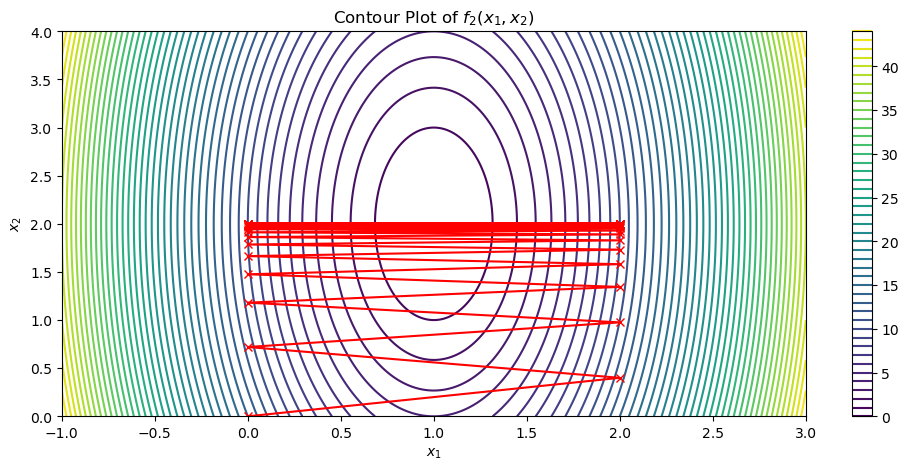

In [ ]:
x1 = np.linspace(-1, 3, 400)
x2 = np.linspace(0, 4, 400)
X1, X2 = np.meshgrid(x1, x2)
Z2 = fn2((X1, X2))

plt.figure(figsize=(12, 5))
plt.contour(X1, X2, Z2, levels=50)
plt.colorbar()
plt.title('Contour of $f_2(x_1, x_2) = $')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

x_k_history, _, _, _ = gradient_descent(fn2, grad_fn2, x0, alpha, kmax, tolx, tolf)
x_coords = [point[0] for point in x_k_history]
y_coords = [point[1] for point in x_k_history]

plt.plot(x_coords, y_coords, marker='x', color='red')
plt.show()

##### Results with backtracking